1. Imports and Setup

In [2]:

import os
import cv2
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error
from deepface import DeepFace
import matplotlib.pyplot as plt

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


2. Load and Prepare the Dataset

In [4]:
data_csv_file = 'data_csv_file.csv'
data_df = pd.read_csv(data_csv_file)

# Prepare the data
X = []
y_class = []
y_age = []

for index, row in data_df.iterrows():
    image_path = row['Path']
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Warning: Image at {image_path} could not be loaded.")
        continue
    image = cv2.resize(image, (32, 32)).flatten()  # Resize and flatten the image
    X.append(image)
    y_class.append(row['Identity'])
    y_age.append(row['Age'])

X = np.array(X)
y_class = np.array(y_class)
y_age = np.array(y_age)
print(y_class)
print(y_age)

# Encode class labels
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Split the data
X_train, X_test, y_class_train, y_class_test, y_age_train, y_age_test = train_test_split(
    X, y_class_encoded, y_age, test_size=0.2, random_state=42)


['Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua'
 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua'
 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua'
 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua'
 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Dua'
 'Dua' 'Dua' 'Dua' 'Dua' 'Dua' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna'
 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna'
 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna'
 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna'
 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna'
 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna'
 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna' 'Jenna'
 'Jenna' 'Jenna' 'Jenna' 'Olivia' 'Olivia' 'Olivia' 'Olivia' 'Olivia'
 'Olivia' 'Olivia' 'Olivia' 'Olivia' 'Olivia' 'Olivia' '

3. Model Training

3.1. Train Multiple Classifiers

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier


classifiers = {
    'SVC': SVC(kernel='linear', probability=True),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB(),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'AdaBoost': AdaBoostClassifier(),
    'MLPClassifier': MLPClassifier(),
    'LightGBM': LGBMClassifier()
}

best_classifier = None
best_accuracy = 0

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_class_train)
    y_class_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_class_test, y_class_pred)
    print(f"{name} Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = classifier

print(f"Best Classifier: {best_classifier}")


SVC Accuracy: 0.5
RandomForest Accuracy: 0.6538461538461539
DecisionTree Accuracy: 0.46153846153846156
NaiveBayes Accuracy: 0.5192307692307693
LogisticRegression Accuracy: 0.46153846153846156
KNN Accuracy: 0.5576923076923077
GradientBoosting Accuracy: 0.5
XGBoost Accuracy: 0.6538461538461539
AdaBoost Accuracy: 0.4423076923076923
MLPClassifier Accuracy: 0.38461538461538464
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56443
[LightGBM] [Info] Number of data points in the train set: 205, number of used features: 1024
[LightGBM] [Info] Start training from score -1.371766
[LightGBM] [Info] Start training from score -1.410987
[LightGBM] [Info] Start training from score -1.391184
[LightGBM] [Info] Start training from score -1.371766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

3.2. Train Multiple Regressors

In [6]:
regressors = {
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'RandomForestRegressor': RandomForestRegressor()
}

best_regressor = None
best_mse = float('inf')

for name, regressor in regressors.items():
    regressor.fit(X_train, y_age_train)
    y_age_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_age_test, y_age_pred)
    print(f"{name} Mean Squared Error: {mse}")
    if mse < best_mse:
        best_mse = mse
        best_regressor = regressor

print(f"Best Regressor: {best_regressor}")


LinearRegression Mean Squared Error: 2.917296121411876
SVR Mean Squared Error: 1.2211554175250394
RandomForestRegressor Mean Squared Error: 1.180736538461539
Best Regressor: RandomForestRegressor()


4. Save the Best Models

In [7]:
joblib.dump(best_classifier, 'best_classifier_model.pkl')
joblib.dump(best_regressor, 'best_regressor_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("Best models trained and saved successfully.")


Best models trained and saved successfully.


5. Video Processing, Face Detection, and Prediction with DeepFace

In [8]:
import datetime

# Load the trained models
classifier_model_path = 'best_classifier_model.pkl'
regressor_model_path = 'best_regressor_model.pkl'

# Load the best classifier and regressor
best_classifier = joblib.load(classifier_model_path)
best_regressor = joblib.load(regressor_model_path)

# Initialize label encoder with the appropriate classes
label_encoder = joblib.load('label_encoder.pkl')

# Create directory for saving frames
date_str = datetime.datetime.now().strftime("%Y-%m-%d")
save_dir = f'frames/{date_str}'
os.makedirs(save_dir, exist_ok=True)

# Initialize attendance CSV
attendance_csv = f'attendance_{date_str}.csv'
attendance_df = pd.DataFrame(columns=['Name', 'Time', 'Image Path'])

# Function to mark attendance
def mark_attendance(name, img_path):
    time_str = datetime.datetime.now().strftime("%H:%M:%S")
    attendance_df.loc[len(attendance_df)] = [name, time_str, img_path]
    attendance_df.to_csv(attendance_csv, index=False)

# Initialize video writer for demo
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('demo_video.mp4', fourcc, 20.0, (640, 480))

# Capture video stream
cap = cv2.VideoCapture(0)  # Use 0 for webcam or replace with IP camera URL

print("Processing video stream. This will run for 100 frames.")

saved_frames = []  # List to store paths of saved frames

for _ in range(100):  # Process 100 frames
    ret, frame = cap.read()
    if not ret:
        break

    # Detect faces using DeepFace
    results = DeepFace.extract_faces(frame, detector_backend='opencv', enforce_detection=False)

    for result in results:
        x, y, w, h = result['facial_area']['x'], result['facial_area']['y'], result['facial_area']['w'], result['facial_area']['h']
        face = frame[y:y+h, x:x+w]
        
        # Preprocess face for prediction
        gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        resized_face = cv2.resize(gray_face, (32, 32)).flatten().reshape(1, -1)

        # Predict identity
        predicted_label_encoded = best_classifier.predict(resized_face)
        predicted_label = label_encoder.inverse_transform(predicted_label_encoded)[0]

        # Predict age
        predicted_age = best_regressor.predict(resized_face)[0]

        # Draw bounding box and labels
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        label = f'{predicted_label}, Age: {int(predicted_age)}'
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Save frame
        frame_path = os.path.join(save_dir, f'{datetime.datetime.now().strftime("%H%M%S")}_{predicted_label}.png')
        cv2.imwrite(frame_path, frame)
        saved_frames.append(frame_path)

        # Mark attendance
        mark_attendance(predicted_label, frame_path)

    # Write frame to demo video
    out.write(frame)

# Release video capture and writer
cap.release()
out.release()

print("Video processing completed.")


Processing video stream. This will run for 100 frames.
Video processing completed.


6. Display Processed Frames

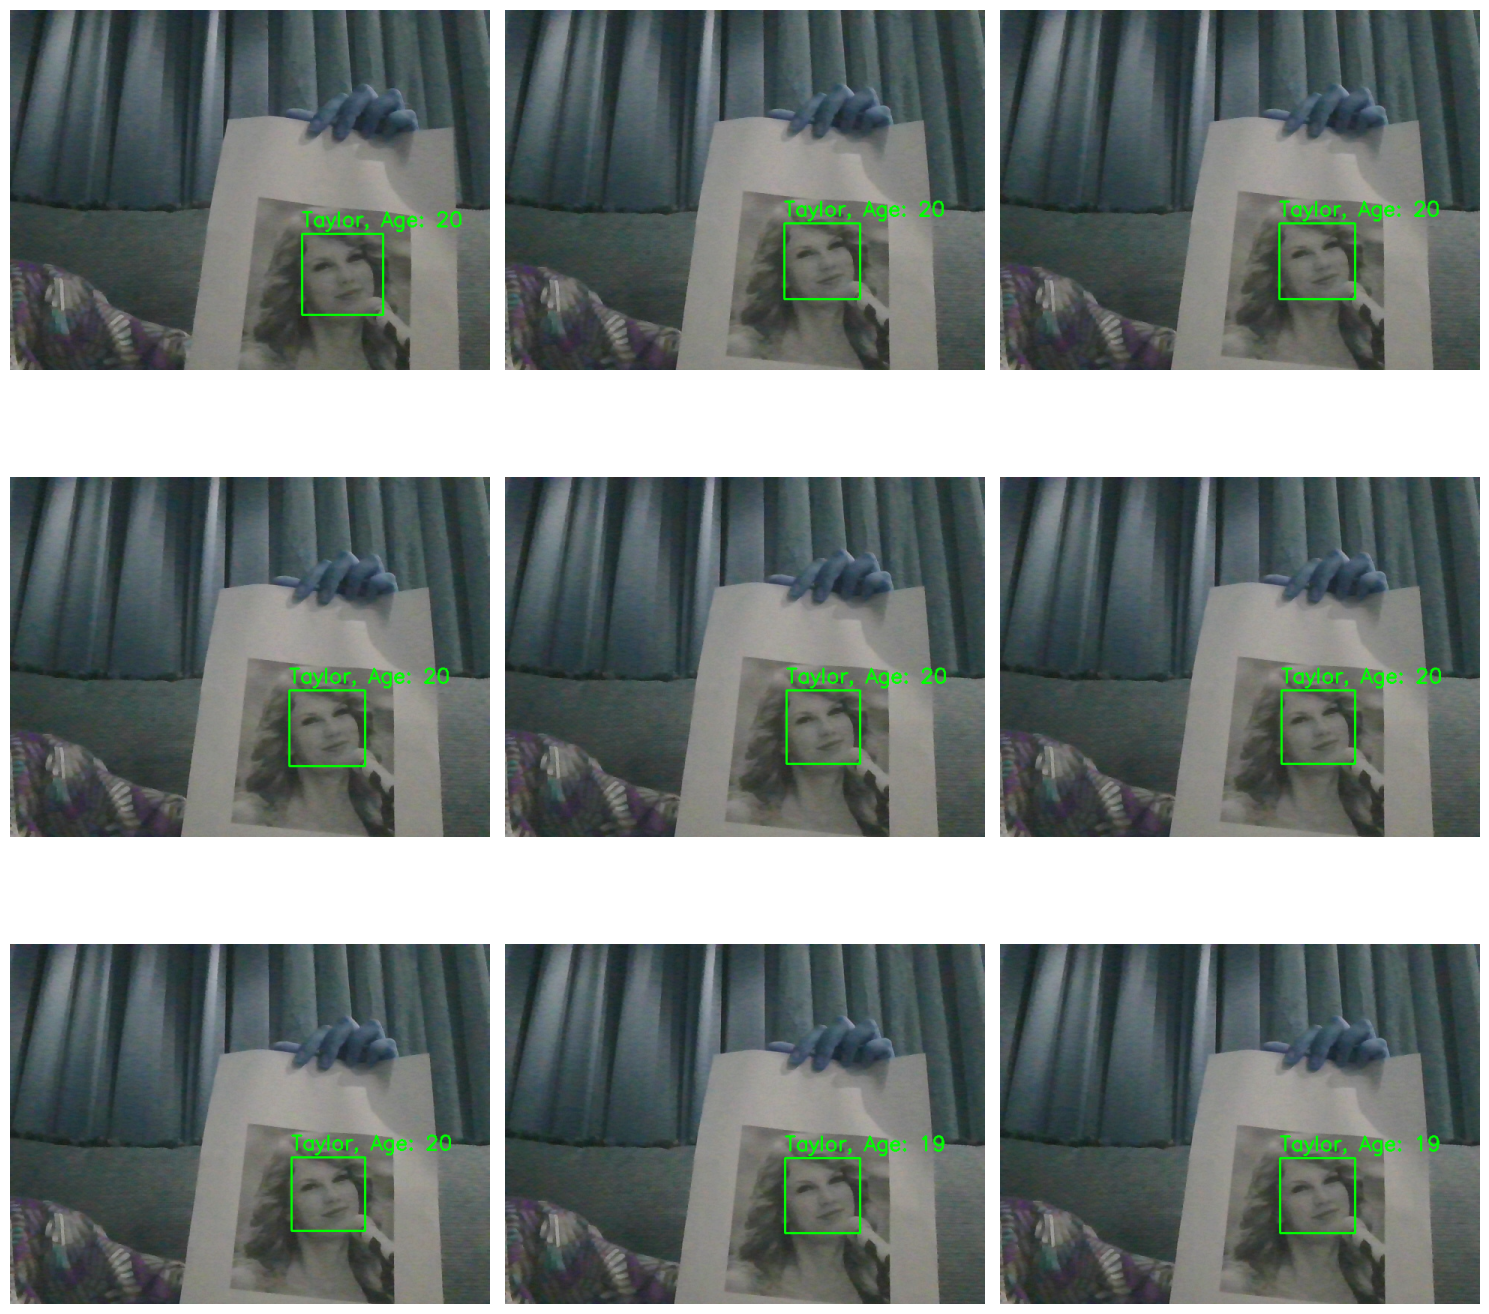

In [9]:
plt.figure(figsize=(15, 15))
for i, frame_path in enumerate(saved_frames[:9]):  # Display up to 9 frames
    plt.subplot(3, 3, i+1)
    img = plt.imread(frame_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.tight_layout()
plt.show()


7. Model Performance: Accuracy and MSE

In [10]:
print(f"Best Classifier Accuracy: {best_accuracy}")
print(f"Best Regressor Mean Squared Error: {best_mse}")


Best Classifier Accuracy: 0.6538461538461539
Best Regressor Mean Squared Error: 1.180736538461539
